# Buổi 3 Trực quan hóa dữ liệu 


## Distribution - Probability density
- Violin 
- Density
- Histogram 
- Boxplot 
- Ridgeline



## Correlation
- Scatter plot
- Connected SPlot
- Bubble plot
- Heatmap
- 2D density plot


## Comparision
- Barplot 
- Boxplot
- Heatmap

## A plot component: 
- X is index 
- Y is value 
- Legend is dict key 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
s1 = pd.Series([1,3,5,6,8])

<Axes: >

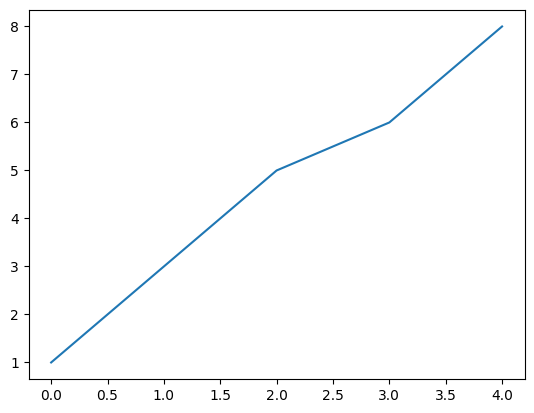

In [4]:
s1.plot()

<Axes: >

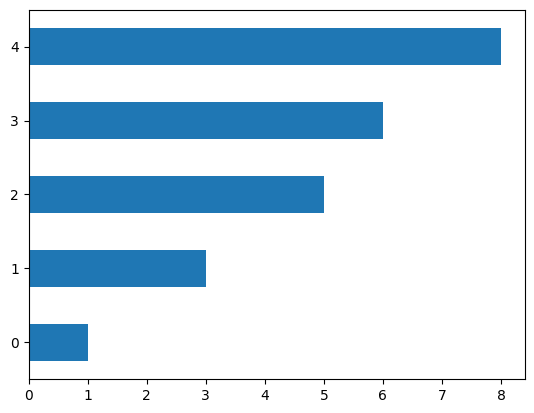

In [5]:
s1.plot(kind='barh')

In [6]:
s1 = pd.Series([1,3,5,6,8], index=['a','b','c','d','e'])

<Axes: >

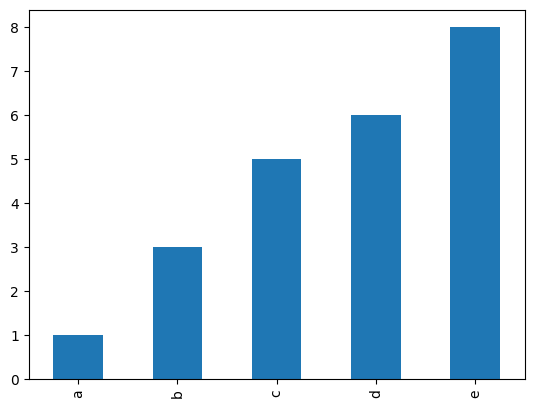

In [7]:
s1.plot(kind='bar')

In [8]:
df = pd.DataFrame({
    'A': [1,3,2,5,8,7],
    'B': [2,4,3,1,5,8],
    'C': [5,3,4,2,6,7]
}, index=[1,2,3,4,5,6])

In [9]:
df.reset_index(drop=True)

,A,B,C
0,1,2,5
1,3,4,3
2,2,3,4
3,5,1,2
4,8,5,6
5,7,8,7


In [10]:
df

,A,B,C
1,1,2,5
2,3,4,3
3,2,3,4
4,5,1,2
5,8,5,6
6,7,8,7


<Axes: >

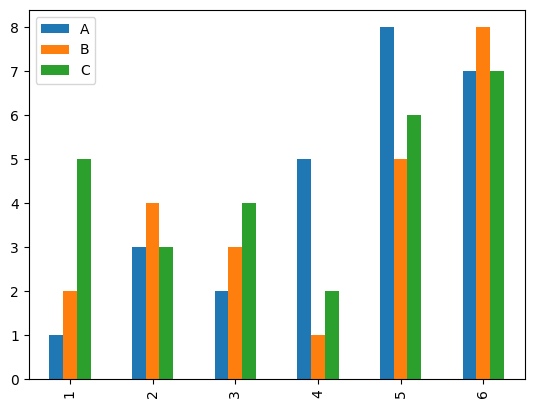

In [11]:
df.plot(kind='bar')

### Nếu không cùng đơn vị thì chuẩn hóa về rồi plot

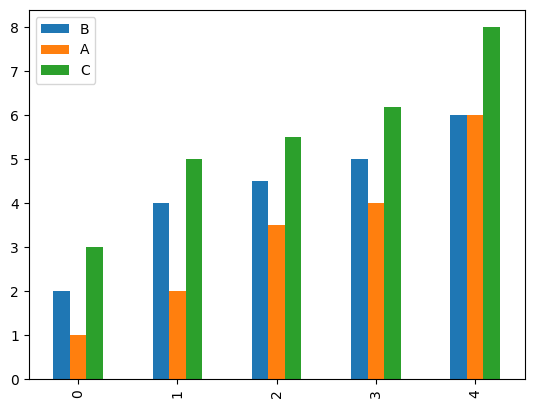

In [12]:
df = pd.DataFrame({
    'B': [2,4,4.5,5,6],
    'A': [1,2,3.5,4,6],
    'C': [3,5,5.5,6.2,8]
})

ax = df.plot(kind='bar', stacked=False)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
plt.style.use(['ggplot'])

In [14]:
df = pd.read_excel('Canada.xlsx', sheet_name=1, skiprows=20, skipfooter=2)

In [15]:
df.rename(
    columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True
)

In [16]:
df.drop(columns=['AREA', 'REG', 'DEV','Type','Coverage'], inplace=True)

In [17]:
df = df.set_index('Country')

<Axes: >

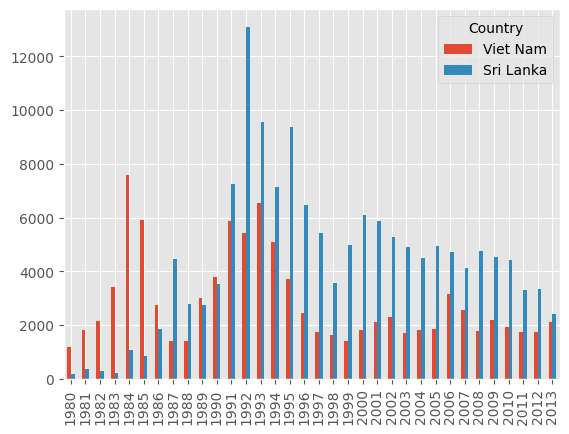

In [18]:
df.loc[["Viet Nam", "Sri Lanka"], 1980:2013].T.plot(kind='bar')

In [19]:
df = pd.DataFrame({
    'San pham': [20,34,30,35,27],
    'Thu Nhap': [25,32,34,20,25],
})

<Axes: xlabel='San pham', ylabel='Thu Nhap'>

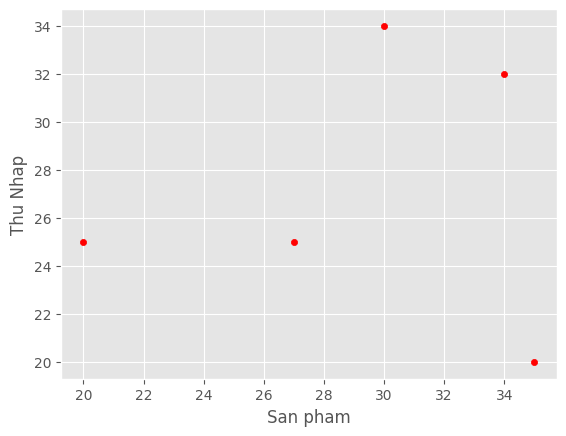

In [22]:
df.plot(kind='scatter', x='San pham', y='Thu Nhap', color='red')

## Các thang đo phân tán
- Range: Max - min 
- Quartile: Divide into 4 parts; Q1 (25% nửa dưới), Q2 (median), Q3(25% nửa trên)
- Interquartile: IQR = Q3 - Q1 <=> thân nến, chiếm 50% giá trị dữ liệu 
- Standard Deviation: trung bình của bình phương độ lệch của các quan sát so với giá trị trung bình của chúng 
- Variance: 
- Coeffecient

In [6]:
import numpy as np 
import pandas as pd
headers = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "price"
]

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", names = headers)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


- Vẽ boxplot biến price dùng 2 cách: Series.plot và seaborn 

In [4]:
import seaborn as sns
import pandas as pd 

In [7]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')

<Axes: >

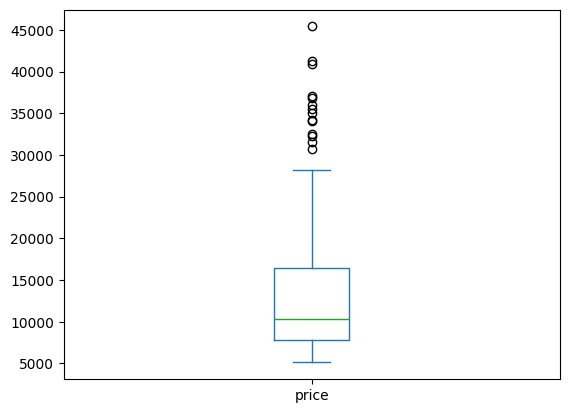

In [8]:
data['price'].plot(kind='box')

<Axes: xlabel='price'>

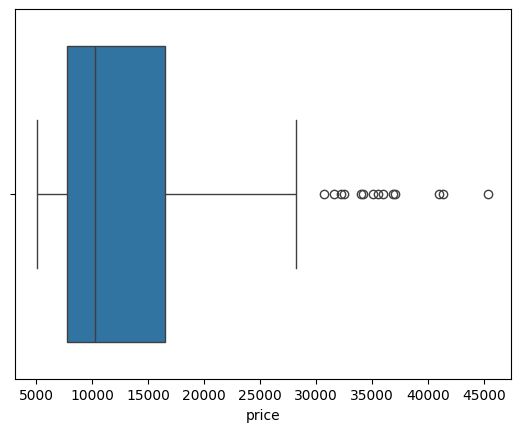

In [8]:
sns.boxplot(x=data["price"])

Tìm các mẫu dữ liệu rơi vào ngoại lệ


In [12]:
# Caculate Q1, Q3, and IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
# Detect outliers
outliers = data[(data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR))]
outliers['price'].unique()

array([30760., 41315., 36880., 32250., 35550., 36000., 31600., 34184.,
       35056., 40960., 45400., 32528., 34028., 37028.])

<Axes: xlabel='drive-wheels', ylabel='price'>

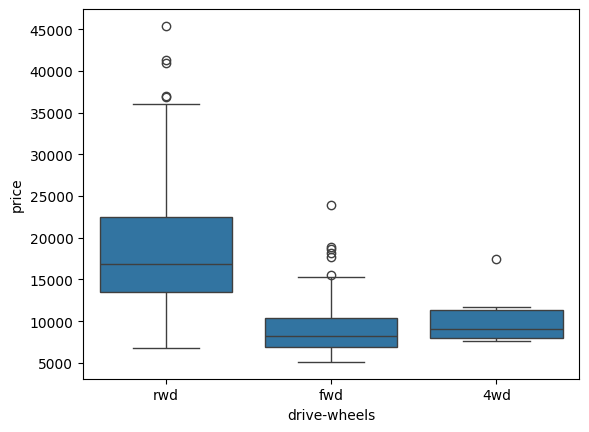

In [13]:
sns.boxplot(x="drive-wheels", y="price", data=data)

drive-wheels
4wd    Axes(0.125,0.11;0.775x0.77)
fwd    Axes(0.125,0.11;0.775x0.77)
rwd    Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

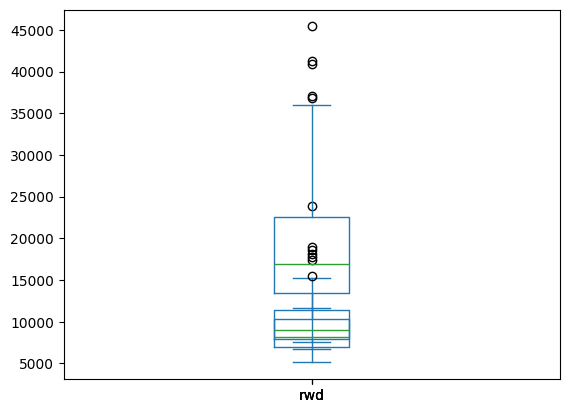

In [14]:
data.groupby("drive-wheels")["price"].plot(kind='box')

# Hình dạng của dữ liệu được đo bằng
- Skewness 
- Kurtosis

In [ ]:
data["price"].skew() # lệch phải    

1.8096753390980749

<Axes: ylabel='Frequency'>

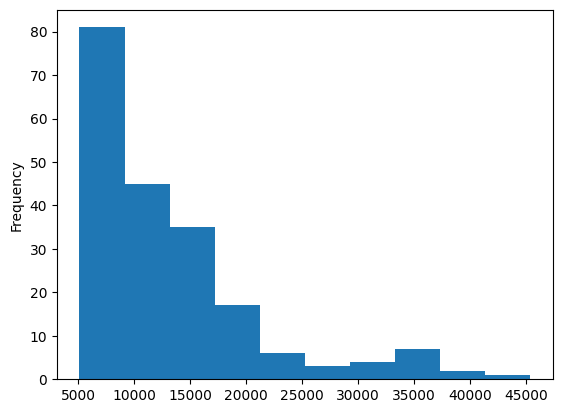

In [11]:
data['price'].plot(kind='hist')

<Axes: ylabel='Density'>

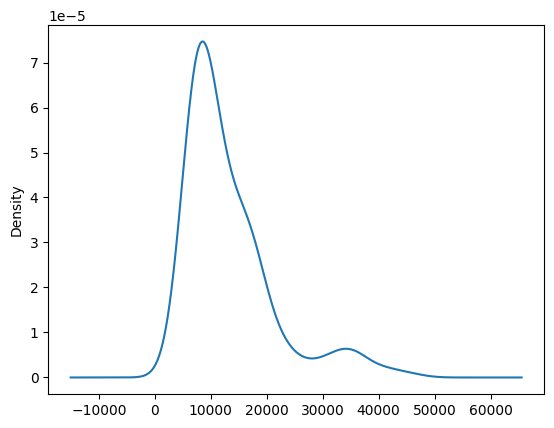

In [12]:
data['price'].plot(kind='kde')

In [13]:
data['price'].kurt()

3.2315368868295193

# Correlation 
- Pearson 
- 

In [14]:
data[['engine-size', 'price']].corr()


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


# Heatmap mathplotlib, seaborn 


In [ ]:
ư

# Gom Nhóm 